# Test whether the covariance is diagonal and Gaussian.

In [34]:
%load_ext autoreload
%autoreload 2

from py21cmmc_fg.core import CoreForegrounds, CoreInstrumental
from py21cmmc_fg.likelihood import LikelihoodForeground2D

import numpy as np
from cosmoHammer.ChainContext import ChainContext

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
fg_core = CoreForegrounds(
    pt_source_params=dict(
        S_min=1e-1,
        S_max=1.0
    ),
    diffuse_params=dict(
        u0=10.0,
        eta = 0.01,
        rho = -2.7,
        mean_temp=253e3,
        kappa=-2.55
    ),
    add_point_sources=True,
    add_diffuse=False,
    redshifts = 1420./np.linspace(150, 160, 30) - 1,
    boxsize=300.0,
    sky_cells = 150
)

instr_core = CoreInstrumental(
    antenna_posfile="grid_centres",
    freq_min=150.0, freq_max=160.0, nfreq=30,
    tile_diameter=4.0,
    max_bl_length=150.0,
    Tsys=0
)

lk = LikelihoodForeground2D(datafile=None, n_psbins=50)

yeah in here


In [44]:
fg_core.setup()
instr_core.setup()

Generating the foregrounds


In [45]:
ctx = ChainContext('derp', {"a":1})

In [46]:
fg_core(ctx)
instr_core(ctx)

Getting the simulation data
Added lightcone
Sampling the data onto baselines
[160.         159.65517241 159.31034483 158.96551724 158.62068966
 158.27586207 157.93103448 157.5862069  157.24137931 156.89655172
 156.55172414 156.20689655 155.86206897 155.51724138 155.17241379
 154.82758621 154.48275862 154.13793103 153.79310345 153.44827586
 153.10344828 152.75862069 152.4137931  152.06896552 151.72413793
 151.37931034 151.03448276 150.68965517 150.34482759 150.        ]
[150.         150.34482759 150.68965517 151.03448276 151.37931034
 151.72413793 152.06896552 152.4137931  152.75862069 153.10344828
 153.44827586 153.79310345 154.13793103 154.48275862 154.82758621
 155.17241379 155.51724138 155.86206897 156.20689655 156.55172414
 156.89655172 157.24137931 157.5862069  157.93103448 158.27586207
 158.62068966 158.96551724 159.31034483 159.65517241 160.        ]


In [47]:
p, k = lk.computePower(ctx)

(150, 150)


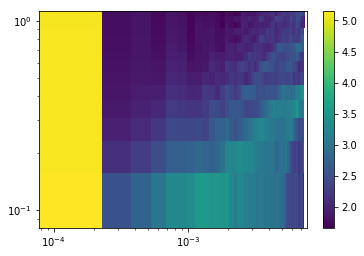

In [50]:
plt.imshow(np.log10(p), origin='lower', aspect='auto', extent=(k[0][0], k[0][-1], k[1][0], k[1][-1]))
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

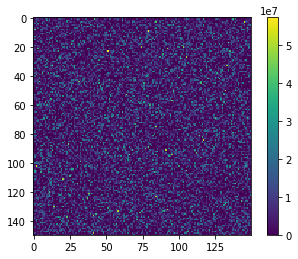

In [53]:
plt.imshow(ctx.get("output").lightcone_box[:,:,0])
plt.colorbar()

In [54]:
p = [0]*30
for i in range(30):
    fg_core(ctx)
    instr_core(ctx)
    p[i] = lk.computePower(ctx)[0].flatten()
    
mean = np.mean(p,axis=0)
cov = np.cov(p)

Getting the simulation data
Sampling the data onto baselines
[160.         159.65517241 159.31034483 158.96551724 158.62068966
 158.27586207 157.93103448 157.5862069  157.24137931 156.89655172
 156.55172414 156.20689655 155.86206897 155.51724138 155.17241379
 154.82758621 154.48275862 154.13793103 153.79310345 153.44827586
 153.10344828 152.75862069 152.4137931  152.06896552 151.72413793
 151.37931034 151.03448276 150.68965517 150.34482759 150.        ]
[150.         150.34482759 150.68965517 151.03448276 151.37931034
 151.72413793 152.06896552 152.4137931  152.75862069 153.10344828
 153.44827586 153.79310345 154.13793103 154.48275862 154.82758621
 155.17241379 155.51724138 155.86206897 156.20689655 156.55172414
 156.89655172 157.24137931 157.5862069  157.93103448 158.27586207
 158.62068966 158.96551724 159.31034483 159.65517241 160.        ]
(150, 150)
Getting the simulation data
Sampling the data onto baselines
[160.         159.65517241 159.31034483 158.96551724 158.62068966
 158.27

(150, 150)
Getting the simulation data
Sampling the data onto baselines
[160.         159.65517241 159.31034483 158.96551724 158.62068966
 158.27586207 157.93103448 157.5862069  157.24137931 156.89655172
 156.55172414 156.20689655 155.86206897 155.51724138 155.17241379
 154.82758621 154.48275862 154.13793103 153.79310345 153.44827586
 153.10344828 152.75862069 152.4137931  152.06896552 151.72413793
 151.37931034 151.03448276 150.68965517 150.34482759 150.        ]
[150.         150.34482759 150.68965517 151.03448276 151.37931034
 151.72413793 152.06896552 152.4137931  152.75862069 153.10344828
 153.44827586 153.79310345 154.13793103 154.48275862 154.82758621
 155.17241379 155.51724138 155.86206897 156.20689655 156.55172414
 156.89655172 157.24137931 157.5862069  157.93103448 158.27586207
 158.62068966 158.96551724 159.31034483 159.65517241 160.        ]
(150, 150)
Getting the simulation data
Sampling the data onto baselines
[160.         159.65517241 159.31034483 158.96551724 158.62068

(150, 150)
Getting the simulation data
Sampling the data onto baselines
[160.         159.65517241 159.31034483 158.96551724 158.62068966
 158.27586207 157.93103448 157.5862069  157.24137931 156.89655172
 156.55172414 156.20689655 155.86206897 155.51724138 155.17241379
 154.82758621 154.48275862 154.13793103 153.79310345 153.44827586
 153.10344828 152.75862069 152.4137931  152.06896552 151.72413793
 151.37931034 151.03448276 150.68965517 150.34482759 150.        ]
[150.         150.34482759 150.68965517 151.03448276 151.37931034
 151.72413793 152.06896552 152.4137931  152.75862069 153.10344828
 153.44827586 153.79310345 154.13793103 154.48275862 154.82758621
 155.17241379 155.51724138 155.86206897 156.20689655 156.55172414
 156.89655172 157.24137931 157.5862069  157.93103448 158.27586207
 158.62068966 158.96551724 159.31034483 159.65517241 160.        ]
(150, 150)
Getting the simulation data
Sampling the data onto baselines
[160.         159.65517241 159.31034483 158.96551724 158.62068

(150, 150)


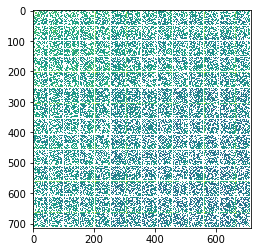

In [64]:
plt.imshow(np.log10(cov.T))

In [61]:
cov.shape

(714, 714)

In [60]:
cov = np.cov(np.array(p).T)